# Tobig's 18기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [275]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [278]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [279]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [280]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [281]:
# parameter 개수
N = len(X_train.loc[0])

In [282]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.49064674, 0.17717297, 0.32835422])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [117]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1+e^{-z}}\qquad where,\ z= X_i\theta$ 

In [246]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1/(1+np.exp(-z))    
    return p

In [245]:
logistic(X_train.iloc[1], parameters)

1.3664834655305598 1.3664834655305598


0.7968114103459134

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) =-\sum\{y_ilogp(\hat{y_i})+(1-y_i)log(1-p(\hat{y_i}))\}$ 

In [202]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss = -(y*np.log(p)+(1-y)*np.log(1-p))
    return loss

In [203]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X,parameters)
    loss = np.power(y-y_hat, 2)
    return loss

In [204]:
def batch_loss(X_set, y_set, parameters, loss_function, n):
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss /= n #loss 평균값으로 계산
    return loss

In [205]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.746463953014195

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=\Sigma(y_i - \theta^{T}X_i)x_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)=-{\partial\over{\partial \theta_j}}\sum\{y_ilogp(\hat{y_i})+(1-y_i)log(1-p(\hat{y_i}))\}$
## $=-{\partial\over{\partial \theta_j}}\sum\{y_ilog\frac{p(\hat{y_i})}{1-p(\hat{y_i})})+log(1-p(\hat{y_i})\},p(z)=\frac{1}{1+e^{-z}}$
## $=-{\partial\over{\partial \theta_j}}\sum\{y_ilog\frac{1}{e^{-X_i\theta}}-log(\frac{1+e^{-X_i\theta}}{e^{-X_i\theta}})\}$
## $=-{\partial\over{\partial \theta_j}}\sum\{y_iX_i\theta-log(1+e^{X_i\theta})\}$
## $=-\sum\{y_ix_{ij}-\frac{1}{1+e^{-X_i\theta}}x_{ij}\}$
## $=-\sum(y_i-p_i)x_{ij}$

In [248]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X,parameters)
        gradient = (y-y_hat)*X[j]
    else:
        p = logistic(X,parameters)
        gradient = (y-p)*X[j]
    return -gradient

In [249]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.09676636022736304

In [201]:
from IPython.display import Image

Image("C:/Users/김건우/Desktop/배치알고리즘_구현.png")

FileNotFoundError: No such file or directory: 'C:/Users/김건우/Desktop/배치알고리즘_구현.png'

FileNotFoundError: No such file or directory: 'C:/Users/김건우/Desktop/배치알고리즘_구현.png'

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [250]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [251]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[49.162616603293806, 14.229058559759336, 45.852406833740574]

## mini-batch
인덱스로 미니 배치 나누기

In [252]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 전체 N개의 데이터를 batch_size만큼 나눈뒤, batch_size간격으로 인덱스를 리턴해주는 함수입니다. 
### ex) N=1024, Batch_size=64
### 0 ~ 63, 64 ~ 127, ... , 960 ~ 1023

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [253]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n
        
    parameters -= gradients
    return parameters

In [254]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.59346696, 0.62320384, 0.67396888])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 현재 train 횟수
- num_epoch: 전체 train을 반복하는 횟수
<br>

##### BGD: batch_size를 train의 수와 동일하게 해서 Gradient Descent를 하는 방법론
##### SGD: batch_size는 1이고, 전체 데이터에서 매번 랜덤하게 뽑아서 Gradient Descent를 하는 방법론
##### MGD: BGD + SGD, batch_size를 mini-batch로 지정해서 나누어 Gradient Descent를 하는 방법론  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
<br>
batch_size=1 -> SGD
<br>
batch_size=k -> MGD  
<br>
batch_size=whole -> BGD

In [208]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, batch_size)
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, batch_size)
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

### 최적의 learning_rate 찾기

In [223]:
#learning_late = 0.1
new_param_1 = gradient_descent(X_train, y_train, 1e-1)
new_param_1

epoch: 0  loss: 0.3821502218847795  params: [-0.03161962  0.07146769  0.60977818]  gradients: [0.017647148434357652, 0.016402015562162166, 0.02243859847569541]
epoch: 100  loss: 0.08286346467676538  params: [-1.47829374  2.97669895 -2.84064833]  gradients: [0.0033664885127684427, 0.004770926851927346, 0.006144682804439566]
epoch: 200  loss: 0.07097477599255861  params: [-1.683353    3.65176764 -3.47345127]  gradients: [0.0031863917396027543, 0.0046599566542293745, 0.005588106714690781]
epoch: 300  loss: 0.0668337464668021  params: [-1.77310156  3.94299237 -3.74369246]  gradients: [0.003141725989476384, 0.004629618378157298, 0.005399065147050264]
epoch: 400  loss: 0.06496285430145342  params: [-1.81794514  4.0878759  -3.8775518 ]  gradients: [0.003125119540522982, 0.004617767412887929, 0.005314763300510103]
epoch: 500  loss: 0.06402442304061828  params: [-1.84160849  4.16418337 -3.94790146]  gradients: [0.0031176710224942506, 0.004612301577433993, 0.005272766290580131]
epoch: 600  loss:

array([-1.86871738,  4.25148731, -4.02826326])

In [224]:
#learning_late = 0.001
new_param_2 = gradient_descent(X_train, y_train, 1e-3)
new_param_2

epoch: 0  loss: 0.5496181642194252  params: [0.86019906 0.40262235 0.28655175]  gradients: [0.00023772553115020812, 0.00021056584302888933, 0.00026630706541489385]
epoch: 100  loss: 0.42633441309430287  params: [0.51113353 0.40704962 0.10201696]  gradients: [0.00020501267261956827, 0.00018464683290157825, 0.00023772988527560936]
epoch: 200  loss: 0.33978722073236606  params: [ 0.2247365   0.4257709  -0.05753328]  gradients: [0.0001723930472666519, 0.00015760745046454995, 0.00020780021909733355]
epoch: 300  loss: 0.282160141899188  params: [-0.00527851  0.45940615 -0.19155185]  gradients: [0.00014423689588060384, 0.00013376536374504517, 0.00018132943419347055]
epoch: 400  loss: 0.24412751919670223  params: [-0.18855373  0.50465188 -0.30439488]  gradients: [0.00012194326584491251, 0.000114816277669187, 0.0001601792712818122]


array([-0.27837359,  0.5349406 , -0.36285268])

In [225]:
#learning_late = 0.00001
new_param_3 = gradient_descent(X_train, y_train,1e-5)
new_param_3

epoch: 0  loss: 0.6907452587638241  params: [0.423904   0.63857287 0.99407078]  gradients: [2.472675476993941e-06, 2.2435093437633888e-06, 2.8487598490842566e-06]
epoch: 100  loss: 0.688881681007726  params: [0.42123171 0.63737011 0.99079303]  gradients: [2.4700301397125887e-06, 2.2416830489811504e-06, 2.846780391205915e-06]
epoch: 200  loss: 0.6870219365129293  params: [0.41856239 0.63617016 0.98751839]  gradients: [2.4673772767367256e-06, 2.2398490773810456e-06, 2.844791978150093e-06]
epoch: 300  loss: 0.6851660343650694  params: [0.41589607 0.63497304 0.98424688]  gradients: [2.4647168996290514e-06, 2.238007420490097e-06, 2.8427946014699257e-06]
epoch: 400  loss: 0.6833139836099601  params: [0.41323274 0.63377876 0.98097851]  gradients: [2.4620490203363765e-06, 2.23615807016934e-06, 2.840788253125526e-06]
epoch: 500  loss: 0.6814657932528806  params: [0.41057242 0.63258733 0.9777133 ]  gradients: [2.4593736511917652e-06, 2.2343010186177877e-06, 2.8387729254883274e-06]
epoch: 600  lo

array([0.39734263, 0.62668487, 0.96146734])

|Learning_late|Loss|
|:-|-:|
|0.1|0.063|
|0.001|0.169|
|0.00001|0.392|

##### 가장 최적의 learning_late 는 0.1 입니다.

### SGD, MGD, BGD 비교 

In [263]:
#SGD
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 0.2771382717889064  params: [-0.88749093  1.04400304 -1.16847462]  gradients: [0.0250372849201231, 0.013625314400895025, 0.017616001869346438]
epoch: 100  loss: 0.07736673567127486  params: [-1.93032545  4.17501884 -4.06769053]  gradients: [0.007538545402484747, 0.004102483618410306, 0.005304050751748659]
epoch: 200  loss: 0.07736266552337544  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159521978802, 0.004102273621869889, 0.00530377924979724]
epoch: 300  loss: 0.07736266518361752  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767159, 0.004102273604340282, 0.005303779227133426]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338873, 0.005303779227131605]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338873, 0.005303779227131605]
epoch: 600  loss: 0.07

array([-1.9303681 ,  4.17514311, -4.06780375])

In [264]:
#MGD
new_param_mgd = gradient_descent(X_train, y_train, batch_size=16)
new_param_mgd

epoch: 0  loss: 0.5049670530532857  params: [0.2813994  0.38794024 0.62937604]  gradients: [0.021924121108301373, 0.020136397958896143, 0.026023213678298407]
epoch: 100  loss: 0.08261504784293756  params: [-1.48196588  2.98896527 -2.85222894]  gradients: [0.003362060697226629, 0.004768344738832121, 0.006132906355331464]
epoch: 200  loss: 0.07090314958627938  params: [-1.68480703  3.65650117 -3.47785658]  gradients: [0.0031855308101752856, 0.004659387782111736, 0.005584810848452997]
epoch: 300  loss: 0.0668035977491536  params: [-1.77380108  3.94525538 -3.74578622]  gradients: [0.003141440194123318, 0.00462941770702254, 0.005397700839013644]
epoch: 400  loss: 0.06494822008868871  params: [-1.81830789  4.08904639 -3.87863169]  gradients: [0.0031249988079634773, 0.004617679659720461, 0.005314106862802398]
epoch: 500  loss: 0.06401683302064012  params: [-1.84180328  4.16481112 -3.94847977]  gradients: [0.0031176132256957845, 0.004612258723663182, 0.005272427439535471]
epoch: 600  loss: 0.0

array([-1.86872753,  4.25151998, -4.0282933 ])

In [265]:
#BGD
new_param_bgd = gradient_descent(X_train, y_train, batch_size=X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.959124828301  params: [0.85822437 0.62073149 0.11947522]  gradients: [0.04095895331527221, 0.0020036126910010755, 0.02089753816444992]
epoch: 100  loss: 0.4391955926345021  params: [-0.78787675  1.00393609 -0.91937043]  gradients: [0.004841486306990962, -0.0055377335812371855, 0.005844291799599085]
epoch: 200  loss: 0.38455811260094136  params: [-1.04495779  1.48864599 -1.40299836]  gradients: [0.0014401935750205648, -0.004179491419110293, 0.004080895399893646]
epoch: 300  loss: 0.3573425760316612  params: [-1.15479986  1.85325974 -1.75753041]  gradients: [0.000888496659406517, -0.0031937445265889405, 0.003094324569004214]
epoch: 400  loss: 0.34103584099687245  params: [-1.23313179  2.13768879 -2.032303  ]  gradients: [0.0007017216217005984, -0.002543470133423901, 0.002449849882332592]
epoch: 500  loss: 0.33040654299465366  params: [-1.29732021  2.36792206 -2.25349568]  gradients: [0.0005897391823885428, -0.0020908740109869617, 0.0020036809818721486]
epoch: 600  loss:

array([-1.50838832,  3.09154649, -2.94128892])

|GD(Batch_size)|Loss|
|:-|-:|
|SGD(1)|0.077|
|MGD(16)|0.063|
|BGD(150)|0.311|

##### 가장 최적의 GD방식은 MGD 입니다.

### Predict Label

In [283]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [284]:
from sklearn.metrics import *

In [285]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]])

In [286]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [233]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [234]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [235]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.68593737, 2.27143951])

In [255]:
#경사하강법
new_param = gradient_descent(X, y, model='linear')
new_param

epoch: 0  loss: 0.17852787341590973  params: [1.13407069 0.91701414]  gradients: [-0.012653037094271777, -0.012975117968687997]
epoch: 100  loss: 0.07800511831187866  params: [0.69636492 2.26496047]  gradients: [0.00328688077171682, 0.0022561807381098332]
epoch: 200  loss: 0.07802327333849657  params: [0.69512525 2.26718409]  gradients: [0.0032926998253072423, 0.002268536852315488]
epoch: 300  loss: 0.07802330692699377  params: [0.69512298 2.26718816]  gradients: [0.0032927104731027656, 0.0022685594617270623]
epoch: 400  loss: 0.07802330698845573  params: [0.69512298 2.26718817]  gradients: [0.003292710492586265, 0.0022685595030981147]
epoch: 500  loss: 0.07802330698856817  params: [0.69512298 2.26718817]  gradients: [0.003292710492621913, 0.0022685595031738033]
epoch: 600  loss: 0.07802330698856837  params: [0.69512298 2.26718817]  gradients: [0.0032927104926219726, 0.0022685595031739264]
epoch: 700  loss: 0.07802330698856837  params: [0.69512298 2.26718817]  gradients: [0.00329271049

array([0.69512298, 2.26718817])

In [261]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

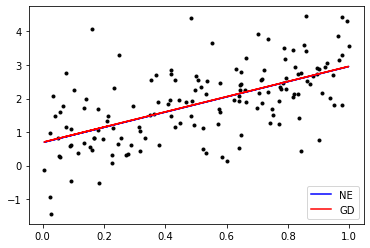

In [262]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()

경사하강법과 선형회귀의 모델 분석이 비슷한 것을 볼 수 있습니다.